# Proyek Sistem Rekomendasi - Rekomendasi Anime

# Data Understanding

Import terlebih dahulu library yang akan digunakan

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Memuat dataset yang akan digunakan

In [99]:
anime = pd.read_csv('/content/anime.csv')

# Menampilkan beberapa baris pertama untuk memeriksa struktur data
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Dataset memiliki 12.294 baris dan 7 kolom

# Exploratory Data Analysis

Menampilkan list variabel dalam dataset

In [100]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Variabel pada dataset terdiri dari:
- anime_id: ID unik untuk setiap anime
- name: Nama anime
- genre: Genre anime
- type: Tipe anime (seperti Movie atau TV)
- episodes: Jumlah episode
- rating: Rating anime
- members: Jumlah anggota yang menonton

In [101]:
print('Jumlah anime: ', len(anime.name.unique()))

Jumlah anime:  12292


Terdapat 12.292 anime

## Kesalahan Tipe Data
Kolom episodes harus diubah dari object menjadi int64 karena merupakan variabel numerik. Namun, kolom episodes mengandung nilai yang tidak dapat dikonversi menjadi integer, seperti Unknown. Maka, perlu menangani nilai yang hilang terlebih dahulu sebelum mengonversinya ke tipe int64.

In [102]:
# Imputasi nilai Unknown pada 'episodes' dengan modus (nilai yang paling sering muncul)
anime['episodes'] = anime['episodes'].replace('Unknown', pd.NA).fillna(anime['episodes'].mode()[0])

In [103]:
# Mengonversi kolom 'episodes' ke tipe integer
anime['episodes'] = anime['episodes'].astype('int64')

# Univariate Analysis

## Variabel Numerik

In [104]:
# Menampilkan statistik deskriptif untuk kolom numerik
numeric_columns = ['rating', 'episodes', 'members']
numeric_summary = anime[numeric_columns].describe()

# Menampilkan statistik deskriptif
numeric_summary

,rating,episodes,members
count,12064.000000,12294.000000,1.229400e+04
mean,6.473902,12.067757,1.807134e+04
std,1.026746,46.250390,5.482068e+04
min,1.670000,1.000000,5.000000e+00
25%,5.880000,1.000000,2.250000e+02
50%,6.570000,2.000000,1.550000e+03
75%,7.180000,12.000000,9.437000e+03
max,10.000000,1818.000000,1.013917e+06


- Rata-rata rating anime adalah sekitar 6.48
- Minimum rating adalah 1.67, dan maksimum adalah 10.
- Sebagian besar anime memiliki jumlah episode yang rendah, dengan rata-rata 12.43 episode. Hal ini menunjukkan bahwa banyak anime yang relatif singkat (misalnya, episode 12 adalah angka umum untuk season).
- Rata-rata jumlah anggota (members) anime adalah sekitar 18.159, dengan jumlah anggota yang sangat tinggi untuk anime populer (mencapai lebih dari 1 juta anggota).


### rating

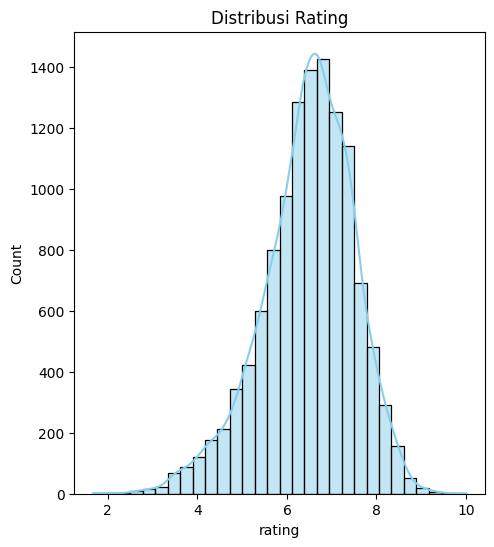

In [105]:
# Rating
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(anime['rating'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Rating')

plt.show()

- Distribusi rating terlihat normal, dengan puncak di sekitar nilai 6-7, menunjukkan bahwa sebagian besar anime mendapatkan penilaian yang cukup baik, tetapi tidak luar biasa tinggi.
- Ada outliers pada rating dengan beberapa anime mendapatkan rating 10 (terbaik), meskipun jumlahnya sangat sedikit.




### episodes

Text(0.5, 1.0, 'Distribusi Episodes')

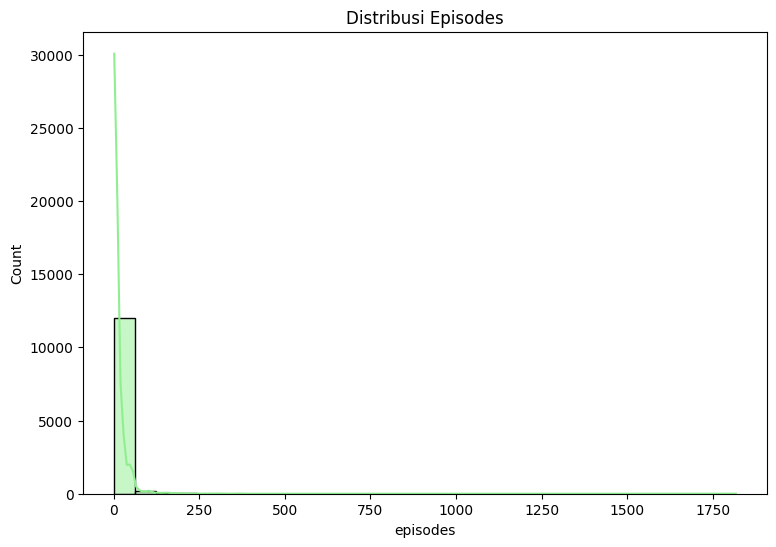

In [106]:
# Episodes
plt.figure(figsize=(30, 6))
plt.subplot(1, 3, 2)
sns.histplot(anime['episodes'], kde=True, bins=30, color='lightgreen')
plt.title('Distribusi Episodes')

- Sebagian besar anime memiliki jumlah episode yang sangat sedikit, dengan banyak anime memiliki hanya satu episode (film) atau sedikit episode.
- Distribusi dengan log scale menunjukkan bahwa ada beberapa anime dengan jumlah episode yang sangat tinggi (misalnya, lebih dari 100 episode), tetapi ini sangat jarang terjadi.



### members

Text(0.5, 1.0, 'Distribusi Members')

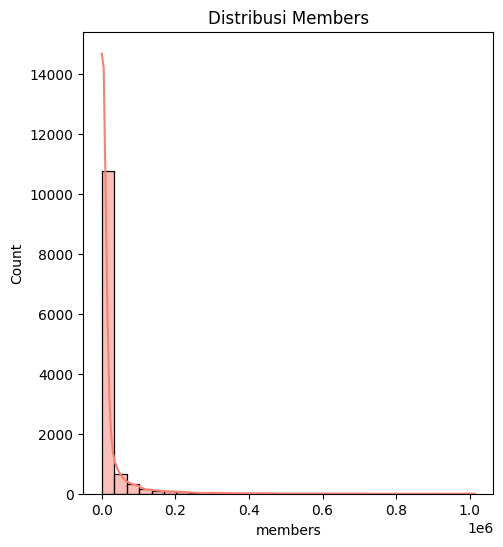

In [107]:
# Members
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.histplot(anime['members'], kde=True, bins=30, color='salmon')
plt.title('Distribusi Members')

- Ada banyak anime dengan jumlah anggota yang sangat rendah, tetapi anime yang lebih populer mendapatkan jumlah anggota yang jauh lebih tinggi.
- Terdapat skewness yang kuat, dengan beberapa anime yang sangat populer menambah jumlah anggota secara signifikan.

## Variabel Kategorikal

### Genre

In [108]:
# Menampilkan frekuensi untuk kolom 'genre'
genre_counts = anime['genre'].value_counts()

# Menampilkan hasil frekuensi untuk genre
genre_counts.head()

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179


Text(0.5, 0, 'Jumlah Anime')

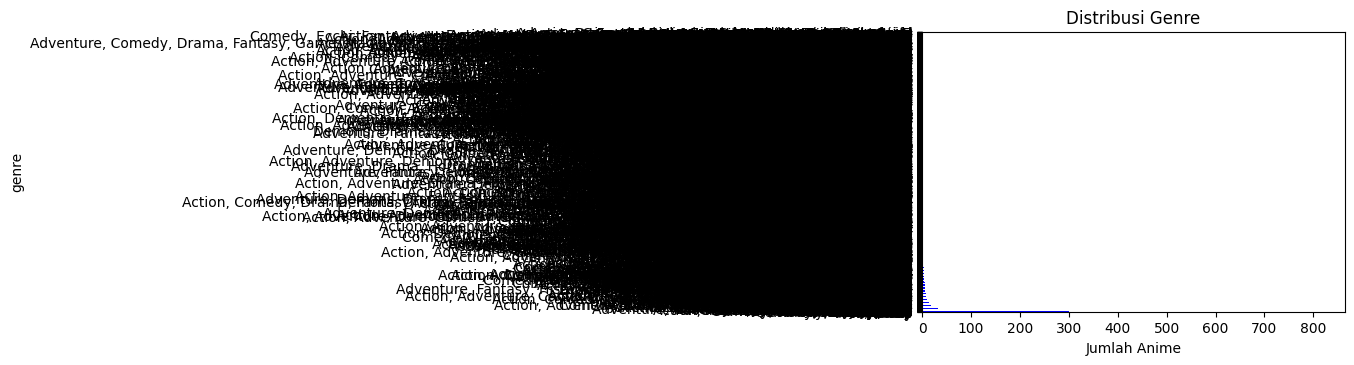

In [109]:
# Genre
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
genre_counts.plot(kind='barh', color='blue')
plt.title('Distribusi Genre')
plt.xlabel('Jumlah Anime')

- Genre anime sering kali memiliki beberapa kombinasi genre, seperti "Action, Comedy, Drama", yang menunjukkan bahwa banyak anime dapat digolongkan dalam lebih dari satu kategori.
- Genre yang paling sering muncul adalah Hentai, Comedy, dan Music, yang menunjukkan bahwa genre-genre ini paling umum dalam dataset.
- Heterogenitas genre (beragamnya kombinasi genre) menunjukkan bahwa penonton anime mungkin memiliki selera yang sangat beragam, dan anime sering kali menarik dari berbagai jenis cerita atau tema.

### Type

In [110]:
# Menampilkan frekuensi untuk kolom 'type'
type_counts = anime['type'].value_counts()

# Menampilkan hasil frekuensi untuk genre
type_counts.head()

,count
type,
TV,3787
OVA,3311
Movie,2348
Special,1676
ONA,659


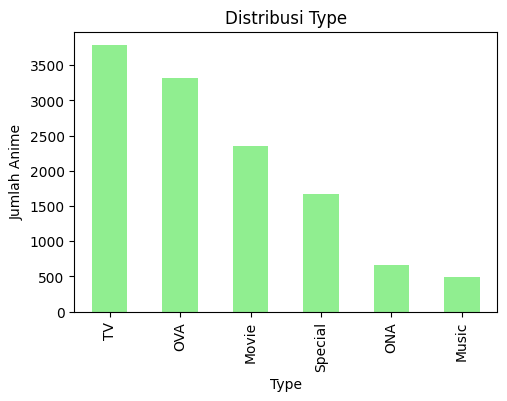

In [111]:
# Type
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
type_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Type')
plt.xlabel('Type')
plt.ylabel('Jumlah Anime')
plt.show()

- Jenis anime yang paling banyak ditemukan adalah TV dan OVA, yang menunjukkan bahwa sebagian besar anime dalam dataset ini adalah serial anime dengan durasi lebih panjang atau produksi khusus.
- Movie, Special, dan ONA hadir dalam jumlah yang lebih sedikit, yang menunjukkan bahwa anime dalam format-film atau spesial lebih jarang dibandingkan dengan serial TV.

# Data Preparation

## Mengatasi Missing Value

In [112]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


Seperti yang kita lihat, variabel genre, type, dan rating memiliki beberapa missing value. Karena jumlah missing values tidak terlalu banyak dapat dilakukan penghapusan pada missing values.

In [113]:
anime.dropna(subset=['genre', 'type', 'rating'], inplace=True)

Cek kembali ukuran dataset setelah penghapusan.

In [114]:
anime.shape

(12017, 7)

Setelah penghapusan masih ada 12017 entri yang cukup untuk dilakukan analisis lebih lanjut.

In [115]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


Sekarang, dataset memiliki 0 missing values.

## Duplikasi Data

In [116]:
anime['name'].value_counts()

,count
name,
Shi Wan Ge Leng Xiaohua,2
Saru Kani Gassen,2
CCW: Crazy Clay Wrestling,1
Crayon Angel,1
Koumon-teki Juuku Ketsujiru Juke,1
...,...
Bakusou Kyoudai Let&#039;s &amp; Go!! WGP Bousou Mini Yonku Daitsuiseki,1
Beet the Vandel Buster Excellion,1
Black Jack ONA,1


Dapat dilihat ada beberapa anime yang tercatat lebih dari satu, maka dari itu kita perlu melakukan drop agar hasil rekomendasi lebih akurat.

In [117]:
anime = anime[~anime['name'].duplicated(keep='first')]

Pengecekan kembali untuk data duplikat.

In [118]:
anime['name'].value_counts()

,count
name,
Kimi no Na wa.,1
CCW: Crazy Clay Wrestling,1
Crayon Angel,1
Koumon-teki Juuku Ketsujiru Juke,1
The Embryo Develops into a Fetus,1
...,...
Bakusou Kyoudai Let&#039;s &amp; Go!! WGP Bousou Mini Yonku Daitsuiseki,1
Beet the Vandel Buster Excellion,1
Black Jack ONA,1


Dapat dilihat bahwa sudah tidak ada data duplikat.

## Feature Engineering

Kita akan memilih kolom yang relevan terlebih dahulu

In [119]:
rec_anime = anime[['anime_id', 'name', 'genre']]
rec_anime.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


 Lalu, dilakukan pembersihan dan standarisasi kolom genre untuk memastikan konsistensi format. Proses ini penting untuk TF-IDF Vectorization karena tanda hubung dan spasi berpengaryh

In [120]:
# Mengambil genre yang unik setelah memecah genre yang dipisah dengan koma
all_genres = anime['genre'].str.split(', ').explode().unique()

# Menampilkan semua genre yang ada
print(all_genres)

['Drama' 'Romance' 'School' 'Supernatural' 'Action' 'Adventure' 'Fantasy'
 'Magic' 'Military' 'Shounen' 'Comedy' 'Historical' 'Parody' 'Samurai'
 'Sci-Fi' 'Thriller' 'Sports' 'Super Power' 'Space' 'Slice of Life'
 'Mecha' 'Music' 'Mystery' 'Seinen' 'Martial Arts' 'Vampire' 'Shoujo'
 'Horror' 'Police' 'Psychological' 'Demons' 'Ecchi' 'Josei' 'Shounen Ai'
 'Game' 'Dementia' 'Harem' 'Cars' 'Kids' 'Shoujo Ai' 'Hentai' 'Yaoi'
 'Yuri']


In [121]:
# Mengganti genre tertentu dengan nama genre yang lebih konsisten
rec_anime.loc[rec_anime['genre'].str.contains('Drama', na=False), 'genre'] = rec_anime['genre'].str.replace('Drama', 'drama')
rec_anime.loc[rec_anime['genre'].str.contains('Romance', na=False), 'genre'] = rec_anime['genre'].str.replace('Romance', 'romance')
rec_anime.loc[rec_anime['genre'].str.contains('School', na=False), 'genre'] = rec_anime['genre'].str.replace('School', 'school')
rec_anime.loc[rec_anime['genre'].str.contains('Supernatural', na=False), 'genre'] = rec_anime['genre'].str.replace('Supernatural', 'supernatural')
rec_anime.loc[rec_anime['genre'].str.contains('Action', na=False), 'genre'] = rec_anime['genre'].str.replace('Action', 'action')
rec_anime.loc[rec_anime['genre'].str.contains('Adventure', na=False), 'genre'] = rec_anime['genre'].str.replace('Adventure', 'adventure')
rec_anime.loc[rec_anime['genre'].str.contains('Fantasy', na=False), 'genre'] = rec_anime['genre'].str.replace('Fantasy', 'fantasy')
rec_anime.loc[rec_anime['genre'].str.contains('Magic', na=False), 'genre'] = rec_anime['genre'].str.replace('Magic', 'magic')
rec_anime.loc[rec_anime['genre'].str.contains('Military', na=False), 'genre'] = rec_anime['genre'].str.replace('Military', 'military')
rec_anime.loc[rec_anime['genre'].str.contains('Shounen', na=False), 'genre'] = rec_anime['genre'].str.replace('Shounen', 'shounen')
rec_anime.loc[rec_anime['genre'].str.contains('Comedy', na=False), 'genre'] = rec_anime['genre'].str.replace('Comedy', 'comedy')
rec_anime.loc[rec_anime['genre'].str.contains('Historical', na=False), 'genre'] = rec_anime['genre'].str.replace('Historical', 'historical')
rec_anime.loc[rec_anime['genre'].str.contains('Parody', na=False), 'genre'] = rec_anime['genre'].str.replace('Parody', 'parody')
rec_anime.loc[rec_anime['genre'].str.contains('Samurai', na=False), 'genre'] = rec_anime['genre'].str.replace('Samurai', 'samurai')
rec_anime.loc[rec_anime['genre'].str.contains('Sci-Fi', na=False), 'genre'] = rec_anime['genre'].str.replace('Sci-Fi', 'scifi')
rec_anime.loc[rec_anime['genre'].str.contains('Thriller', na=False), 'genre'] = rec_anime['genre'].str.replace('Thriller', 'thriller')
rec_anime.loc[rec_anime['genre'].str.contains('Sports', na=False), 'genre'] = rec_anime['genre'].str.replace('Sports', 'sports')
rec_anime.loc[rec_anime['genre'].str.contains('Super Power', na=False), 'genre'] = rec_anime['genre'].str.replace('Super Power', 'superpower')
rec_anime.loc[rec_anime['genre'].str.contains('Space', na=False), 'genre'] = rec_anime['genre'].str.replace('Space', 'space')
rec_anime.loc[rec_anime['genre'].str.contains('Slice of Life', na=False), 'genre'] = rec_anime['genre'].str.replace('Slice of Life', 'sliceoflife')
rec_anime.loc[rec_anime['genre'].str.contains('Mecha', na=False), 'genre'] = rec_anime['genre'].str.replace('Mecha', 'mecha')
rec_anime.loc[rec_anime['genre'].str.contains('Music', na=False), 'genre'] = rec_anime['genre'].str.replace('Music', 'music')
rec_anime.loc[rec_anime['genre'].str.contains('Mystery', na=False), 'genre'] = rec_anime['genre'].str.replace('Mystery', 'mystery')
rec_anime.loc[rec_anime['genre'].str.contains('Seinen', na=False), 'genre'] = rec_anime['genre'].str.replace('Seinen', 'seinen')
rec_anime.loc[rec_anime['genre'].str.contains('Martial Arts', na=False), 'genre'] = rec_anime['genre'].str.replace('Martial Arts', 'martialarts')
rec_anime.loc[rec_anime['genre'].str.contains('Vampire', na=False), 'genre'] = rec_anime['genre'].str.replace('Vampire', 'vampire')
rec_anime.loc[rec_anime['genre'].str.contains('Shoujo', na=False), 'genre'] = rec_anime['genre'].str.replace('Shoujo', 'shoujo')
rec_anime.loc[rec_anime['genre'].str.contains('Horror', na=False), 'genre'] = rec_anime['genre'].str.replace('Horror', 'horror')
rec_anime.loc[rec_anime['genre'].str.contains('Police', na=False), 'genre'] = rec_anime['genre'].str.replace('Police', 'police')
rec_anime.loc[rec_anime['genre'].str.contains('Psychological', na=False), 'genre'] = rec_anime['genre'].str.replace('Psychological', 'psychological')
rec_anime.loc[rec_anime['genre'].str.contains('Demons', na=False), 'genre'] = rec_anime['genre'].str.replace('Demons', 'demons')
rec_anime.loc[rec_anime['genre'].str.contains('Ecchi', na=False), 'genre'] = rec_anime['genre'].str.replace('Ecchi', 'ecchi')
rec_anime.loc[rec_anime['genre'].str.contains('Josei', na=False), 'genre'] = rec_anime['genre'].str.replace('Josei', 'josei')
rec_anime.loc[rec_anime['genre'].str.contains('Shounen Ai', na=False), 'genre'] = rec_anime['genre'].str.replace('Shounen Ai', 'shounenai')
rec_anime.loc[rec_anime['genre'].str.contains('Game', na=False), 'genre'] = rec_anime['genre'].str.replace('Game', 'game')
rec_anime.loc[rec_anime['genre'].str.contains('Dementia', na=False), 'genre'] = rec_anime['genre'].str.replace('Dementia', 'dementia')
rec_anime.loc[rec_anime['genre'].str.contains('Harem', na=False), 'genre'] = rec_anime['genre'].str.replace('Harem', 'harem')
rec_anime.loc[rec_anime['genre'].str.contains('Cars', na=False), 'genre'] = rec_anime['genre'].str.replace('Cars', 'cars')
rec_anime.loc[rec_anime['genre'].str.contains('Kids', na=False), 'genre'] = rec_anime['genre'].str.replace('Kids', 'kids')
rec_anime.loc[rec_anime['genre'].str.contains('Shoujo Ai', na=False), 'genre'] = rec_anime['genre'].str.replace('Shoujo Ai', 'shoujoai')
rec_anime.loc[rec_anime['genre'].str.contains('Hentai', na=False), 'genre'] = rec_anime['genre'].str.replace('Hentai', 'hentai')
rec_anime.loc[rec_anime['genre'].str.contains('Yaoi', na=False), 'genre'] = rec_anime['genre'].str.replace('Yaoi', 'yaoi')
rec_anime.loc[rec_anime['genre'].str.contains('Yuri', na=False), 'genre'] = rec_anime['genre'].str.replace('Yuri', 'yuri')

# Menampilkan beberapa baris pertama dari dataset setelah penggantian genre
rec_anime.head()


,anime_id,name,genre
0,32281,Kimi no Na wa.,"drama, romance, school, supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"action, adventure, drama, fantasy, magic, mili..."
2,28977,Gintama°,"action, comedy, historical, parody, samurai, s..."
3,9253,Steins;Gate,"scifi, thriller"
4,9969,Gintama&#039;,"action, comedy, historical, parody, samurai, s..."


Mengubah kolom menjadi list

In [122]:
anime_id = rec_anime['anime_id'].tolist()

anime_name = rec_anime['name'].tolist()

anime_genre = rec_anime['genre'].tolist()

# Model Development CBF

In [123]:
# Membuat dictionary untuk data , 'anime_id', 'name', 'genre'
anime_new = pd.DataFrame({
    'id': anime_id,
    'name': anime_name,
    'genre': anime_genre
})
anime_new.head()

,id,name,genre
0,32281,Kimi no Na wa.,"drama, romance, school, supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"action, adventure, drama, fantasy, magic, mili..."
2,28977,Gintama°,"action, comedy, historical, parody, samurai, s..."
3,9253,Steins;Gate,"scifi, thriller"
4,9969,Gintama&#039;,"action, comedy, historical, parody, samurai, s..."


## One Hot Encoding

Penerapan one hot encoding pada genre, 0 berarti genre tidak ada pada anime, 1 berarti ada.

In [124]:
genre_list = []

# Membuat daftar genre unik
for index in anime_new.index:
    temp = anime_new['genre'][index].split(',')
    for i in temp:
        if i not in genre_list:
            genre_list.append(i)

onehot_df = pd.DataFrame(0, index=anime_new.index, columns=genre_list)

# Mengisi nilai 1 untuk genre yang sesuai
for index in anime_new.index:
    temp = anime_new['genre'][index].split(',')
    for i in temp:
        onehot_df.loc[index, i] = 1

anime_new = pd.concat([anime_new, onehot_df], axis=1).fillna(0)
anime_new.head()

,id,name,genre,drama,romance,school,supernatural,action,adventure,drama,...,supernatural,samurai,superpower,vampire,space,hentai,yaoi,hentai,yuri,yaoi
0,32281,Kimi no Na wa.,"drama, romance, school, supernatural",1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"action, adventure, drama, fantasy, magic, mili...",0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"action, comedy, historical, parody, samurai, s...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"scifi, thriller",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,"action, comedy, historical, parody, samurai, s...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Vectorizer

TF-IDF Vectorizer digunakan untuk mengubah teks (seperti genre game) menjadi representasi numerik yang dapat diproses oleh model machine learning. Teknik ini menghitung dua hal: Term Frequency (TF), yang mengukur seberapa sering genre muncul dalam sebuah game, dan Inverse Document Frequency (IDF), yang mengukur seberapa penting genre tersebut dalam keseluruhan dataset. Dengan menggunakan TF-IDF, genre yang lebih jarang muncul mendapat bobot lebih tinggi, sementara genre yang sering muncul diberi bobot rendah.

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(anime_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai',
       'historical', 'horror', 'josei', 'kids', 'magic', 'martialarts',
       'mecha', 'military', 'music', 'mystery', 'parody', 'police',
       'psychological', 'romance', 'samurai', 'school', 'scifi', 'seinen',
       'shoujo', 'shounen', 'sliceoflife', 'space', 'sports',
       'supernatural', 'superpower', 'thriller', 'vampire', 'yaoi',
       'yuri'], dtype=object)

In [126]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(anime_new['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(12015, 42)

In [127]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29500416, 0.3163137 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.26233247, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [128]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan nama anime

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=anime_new.name
).sample(22, axis=1).sample(10, axis=0)

,drama,kids,josei,parody,comedy,music,romance,cars,magic,martialarts,...,ai,ecchi,superpower,historical,thriller,psychological,shounen,action,mecha,mystery
name,,,,,,,,,,,,,,,,,,,,,
DT Eightron,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.619269,0.521841,0.000000,0.0
Yokohama Kaidashi Kikou,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
Berserk: Ougon Jidai-hen II - Doldrey Kouryaku,0.257253,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.226384,0.000000,0.0
Anitore! EX,0.000000,0.0,0.0,0.0,0.431145,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
"Onegai☆Teacher: Marie, Ai no Gekijou",0.519184,0.0,0.0,0.0,0.363868,0.0,0.578111,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
Bakuretsu Tenshi: Infinity,0.000000,0.0,0.0,0.0,0.315164,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.469614,0.395731,0.570611,0.0
Gall Force: New Era,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.305294,0.440208,0.0
CCW: Crazy Clay Wrestling,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
Juubee-chan: Lovely Gantai no Himitsu,0.485272,0.0,0.0,0.0,0.340101,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.506770,0.427042,0.000000,0.0


## Cosine Similarity
- Menghitung cosine similarity antara semua pasangan anime
- Menghasilkan similarity matrix yang akan digunakan untuk rekomendasi

In [129]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14718913, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14718913, 1.        , 0.18637305, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18637305, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [130]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title game
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_new['name'], columns=anime_new['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap game
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12015, 12015)


name,Emblem Take 2,Grappler Baki,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Double-J,Kyoufu Shinbun (2014)
name,,,,,
Batman: Gotham Knight,0.181971,0.179952,0.000000,0.000000,0.000000
Kokoroya,0.000000,0.000000,0.000000,0.000000,0.000000
Dragon Ball Z Movie 07: Kyokugen Battle!! Sandai Super Saiyajin,0.000000,0.260521,0.000000,0.438237,0.155639
Dragon League,0.000000,0.687534,0.000000,0.389070,0.138177
Oz no Mahoutsukai,0.000000,0.000000,0.000000,0.000000,0.340367
Ninpen Manmaru,0.000000,0.236519,0.000000,0.397861,0.000000
Fushigi Yuugi OVA,0.000000,0.000000,0.000000,0.105605,0.120778
Sister Princess,0.192685,0.000000,0.459405,0.108549,0.000000
Lulin Da Maoxian,0.000000,0.000000,0.000000,0.000000,0.242139


Game dengan nilai similarity tinggi (mendekati 1) akan lebih relevan untuk direkomendasikan.



## Euclidean Distance


In [131]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_sim = euclidean_distances(tfidf_matrix)
euclidean_sim

array([[0.        , 1.30599454, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [1.30599454, 0.        , 1.27563862, ..., 1.41421356, 1.41421356,
        1.41421356],
       [1.41421356, 1.27563862, 0.        , ..., 1.41421356, 1.41421356,
        1.41421356],
       ...,
       [1.41421356, 1.41421356, 1.41421356, ..., 0.        , 0.        ,
        0.        ],
       [1.41421356, 1.41421356, 1.41421356, ..., 0.        , 0.        ,
        0.        ],
       [1.41421356, 1.41421356, 1.41421356, ..., 0.        , 0.        ,
        0.        ]])

Matriks ini menggambarkan representasi dokumen dalam bentuk vektor, di mana setiap baris mewakili sebuah dokumen dan setiap kolom mewakili sebuah kata dalam korpus. Nilai di dalam matriks adalah skor TF-IDF, yang mengukur seberapa penting suatu kata dalam dokumen tertentu.

In [132]:
euclidean_sim_df = pd.DataFrame(euclidean_sim, index=anime_new['name'], columns=anime_new['name'])
print('Shape:', euclidean_sim_df.shape)

euclidean_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12015, 12015)


name,Sekaiichi Hatsukoi 2,Daikyouryuu Jidai,Injuu vs. Onna Spy,Fuku-chan,Shadow Skill: Eigi
name,,,,,
Mobile Suit SD Gundam Mk IV,1.414214,1.057839,1.414214,1.414214,1.414214
Di Gi Charat Tsuyu Specials,1.224678,1.414214,1.414214,1.414214,1.414214
Osu,1.414214,1.414214,1.414214,0.723829,1.414214
Kuro Ai: Hitoyozumakan Inkou Rannyuuroku,1.414214,1.414214,0.896237,1.414214,1.414214
Capeta,1.313182,1.414214,1.414214,1.414214,1.329276
Enchanted Journey,1.281155,1.414214,1.414214,1.127165,1.072373
Hai to Gensou no Grimgar Special,1.224678,1.414214,1.414214,1.414214,1.414214
Metal Fight Beyblade: Baku,1.346662,1.414214,1.414214,1.414214,1.309244
"Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!: Motenaishi, Nazomeite Miru",1.344035,1.414214,1.414214,1.020302,1.414214


Output euclidean_sim adalah matriks jarak Euclidean antara semua pasangan. Semakin kecil nilai Euclidean Distance, semakin mirip game tersebut

## Rekomendasi dengan Cosine Similarity

In [133]:
def anime_cosine(anime_name, similarity_data=cosine_sim_df, items=anime_new[['name', 'genre']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,anime_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop name agar title game yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(anime_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [134]:
rec_anime[rec_anime.name.eq('Shingeki no Kyojin')]

,anime_id,name,genre
86,16498,Shingeki no Kyojin,"action, drama, fantasy, shounen, superpower"


In [135]:
anime_cosine('Shingeki no Kyojin')

,name,genre
0,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,"action, drama, fantasy, shounen, superpower"
1,Shingeki no Kyojin OVA,"action, drama, fantasy, shounen, superpower"
2,Shingeki no Kyojin: Ano Hi Kara,"action, drama, fantasy, shounen, superpower"
3,Shingeki no Kyojin Movie 1: Guren no Yumiya,"action, drama, fantasy, shounen, superpower"
4,Saint Seiya: Meiou Hades Elysion-hen,"action, fantasy, shounen, superpower"
5,One Piece,"action, adventure, comedy, drama, fantasy, sho..."
6,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"action, adventure, comedy, drama, fantasy, sho..."
7,One Piece: Episode of Merry - Mou Hitori no Na...,"action, adventure, comedy, drama, fantasy, sho..."
8,One Piece: Romance Dawn Story,"action, comedy, fantasy, shounen, superpower"
9,One Piece: Episode of Nami - Koukaishi no Nami...,"action, adventure, comedy, drama, fantasy, sho..."


Dapat kita lihat bahwa rekomendasi yang diberikan sangat relevan dan memiliki genre yang mirip.

## Rekomendasi dengan Euclidean Distance

In [136]:
def anime_euclidean(anime_name, similarity_data=euclidean_sim_df, items=anime_new[['name', 'genre']], k=10):
    similarity_scores = similarity_data[anime_name].to_numpy()

    closest_indices = similarity_scores.argsort()[:k]

    closest_animes = similarity_data.columns[closest_indices]

    closest_animes = closest_animes.drop(anime_name, errors='ignore')

    if len(closest_animes) < k:
        additional_animes = similarity_data.columns[similarity_scores.argsort()[k:2*k]]
        closest_animes = closest_animes.append(additional_animes).drop_duplicates()

    result_euclidean = pd.DataFrame(closest_animes[:k], columns=['name'])

    result_euclidean = result_euclidean.merge(items, on='name', how='left')

    return result_euclidean.head(k)

In [137]:
rec_anime[rec_anime.name.eq('Death Note')]

,anime_id,name,genre
40,1535,Death Note,"mystery, police, psychological, supernatural, ..."


In [138]:
anime_euclidean('Death Note')

,name,genre
0,Death Note Rewrite,"mystery, police, psychological, supernatural, ..."
1,Mousou Dairinin,"drama, mystery, police, psychological, superna..."
2,Higurashi no Naku Koro ni Kai,"mystery, psychological, supernatural, thriller"
3,Higurashi no Naku Koro ni Rei,"comedy, mystery, psychological, supernatural, ..."
4,Mirai Nikki (TV),"action, mystery, psychological, shounen, super..."
5,Mirai Nikki (TV): Ura Mirai Nikki,"action, comedy, mystery, psychological, shoune..."
6,Higurashi no Naku Koro ni,"horror, mystery, psychological, supernatural, ..."
7,Monster,"drama, horror, mystery, police, psychological,..."
8,AD Police,"adventure, dementia, mecha, mystery, police, p..."
9,Higurashi no Naku Koro ni Kaku: Outbreak,"horror, mystery, psychological, thriller"


Dapat kita lihat bahwa rekomendasi yang diberikan sangat relevan dan memiliki genre yang mirip.

## Precision Model

In [139]:
relevant_animes = anime[anime['genre'].str.contains('Action') | anime['genre'].str.contains('Mystery')]
actual_relevant = relevant_animes['name'].tolist()

cosine_recommended = anime_cosine('Shingeki no Kyojin')['name'].tolist()  # 10 rekomendasi dengan Cosine Similarity
euclidean_recommended = anime_euclidean('Death Note')['name'].tolist()  # 10 rekomendasi dengan Euclidean Distance

print("Cosine Similarity Recommends:", cosine_recommended)
print("Euclidean Distance Recommends:", euclidean_recommended)

def precision_at_k(recommended, actual, k=10):
    relevant_items = sum([1 for anime in recommended[:k] if anime in actual])
    precision = relevant_items / k if k > 0 else 0
    return precision

precision_cosine = precision_at_k(cosine_recommended, actual_relevant, k=10)
precision_euclidean = precision_at_k(euclidean_recommended, actual_relevant, k=10)

# Menampilkan hasil Precision dan Recall
print(f"Precision at k for Cosine Similarity: {precision_cosine:.2f}")
print(f"Precision at k for Euclidean Distance: {precision_euclidean:.2f}")

Cosine Similarity Recommends: ['Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa', 'Shingeki no Kyojin OVA', 'Shingeki no Kyojin: Ano Hi Kara', 'Shingeki no Kyojin Movie 1: Guren no Yumiya', 'Saint Seiya: Meiou Hades Elysion-hen', 'One Piece', 'One Piece: Episode of Sabo - 3 Kyoudai no Kizuna Kiseki no Saikai to Uketsugareru Ishi', 'One Piece: Episode of Merry - Mou Hitori no Nakama no Monogatari', 'One Piece: Romance Dawn Story', 'One Piece: Episode of Nami - Koukaishi no Namida to Nakama no Kizuna']
Euclidean Distance Recommends: ['Death Note Rewrite', 'Mousou Dairinin', 'Higurashi no Naku Koro ni Kai', 'Higurashi no Naku Koro ni Rei', 'Mirai Nikki (TV)', 'Mirai Nikki (TV): Ura Mirai Nikki', 'Higurashi no Naku Koro ni', 'Monster', 'AD Police', 'Higurashi no Naku Koro ni Kaku: Outbreak']
Precision at k for Cosine Similarity: 1.00
Precision at k for Euclidean Distance: 1.00


Hasil perbandingan precision ini menunjukkan bahwa semua rekomendasi yang diberikan oleh kedua metode adalah relevan dan termasuk dalam 10 rekomendasi teratas. Dengan kata lain, kedua model berhasil memberikan hanya rekomendasi yang relevan dalam daftar rekomendasi teratas mereka.